<a href="https://colab.research.google.com/github/Biel-PS/AdvancedFluidMechanics/blob/main/4-BoundaryLayer/Assigment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4. Growth of Turbulent Boundary Layer

In the Notebook we have found a function that computes, for every $c_f$ the corresponding value of $\text{Re}_\delta$ (and, consequently, $\delta$).

1. Use this function to find a power fit of the type

$$
c_f = K \text{Re}_\delta^n
$$

2.  Use this to define a function for the friction velocity as a function of $\delta$ and $U$, `u_tau(delta, U)`

3. Introduce this function into the log-law to find a cloud of points $(y,u)$ and fit again witha power law

$$
\left(\frac{u}{U}\right) = K'\left(\frac{y}{\delta}\right)^m
$$

This is know as the power-law for the turbulent boundary layer. It is, as the log-law, valid only for $y^+ \gtrapprox 30$

4. Finally use the von Kármán equation for steady uniform flow, equation (27), to find how a turbulent boundary layer grows, $\delta(x)$.

First excercie

Fitted Parameters: K = 0.039592853129263854, n = -0.22172613687526932


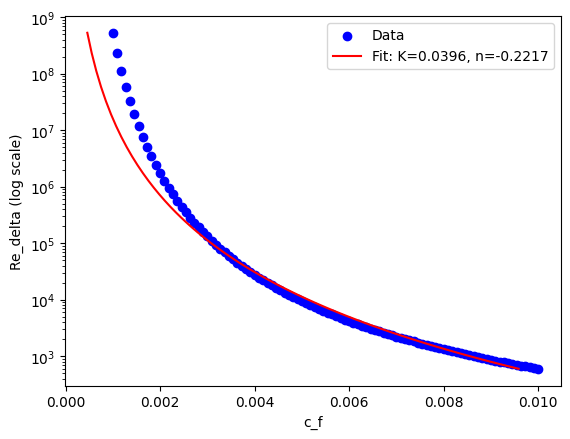

In [34]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt

def Re_fun(c_f):
  Re_delta = 0.182058646604666*np.exp(0.579827560572969/np.sqrt(c_f))/np.sqrt(c_f)
  return Re_delta

def cf(Re_delta, K, n):
    return K * Re_delta**n

# def cf_solution(Re_delta):
#   cf = 0.022 * Re_delta**(-1/6)
#   return cf
# K = 0.02 n=-1/6
start = 0.001
end = 0.01
num_points = 100
vector_cf = np.linspace(start, end, num_points)
vector_Re_delta = Re_fun(vector_cf)

dataVector = [vector_cf,vector_Re_delta]
#dataSolution = [cf_solution(vector_Re_delta),vector_Re_delta]
#print(dataVector)

popt, pcov = opt.curve_fit(cf, dataVector[1], dataVector[0], p0=[0, 0])  # Initial guess

K_fit, n_fit = popt  # Extract fitted parameters
print(f"Fitted Parameters: K = {K_fit}, n = {n_fit}")

# Compute the fitted curve
fitted_cf = cf(vector_Re_delta, K_fit, n_fit)
# Plot original data and fitted curve
plt.scatter(vector_cf,vector_Re_delta, label="Data", color="blue")
plt.plot(fitted_cf,vector_Re_delta, label=f"Fit: K={K_fit:.4f}, n={n_fit:.4f}", color="red")

plt.yscale("log")
plt.ylabel("Re_delta (log scale)")
plt.xlabel("c_f")
plt.legend()
plt.show()

# popt, pcov = opt.curve_fit(cf, dataVector[0],dataVector[1])
# print(popt)

# plt.scatter(dataVector[0],dataVector[1])
# #plt.plot(dataSolution[0],dataSolution[1])
# plt.yscale("log")
# plt.xlabel(" c_f[log]")
# plt.ylabel("Re_delta")
# plt.legend()
# plt.show()


In [35]:
def uTau(delta, U , n,K,rho,nu):
  Re = U*delta/nu
  tau = K*Re**n*0.5*rho*U**2
  u_tau = np.sqrt(tau)/rho
  return u_tau

0.03710496552201154
Fitted Parameters: K' = 0.8922, m = 0.0814


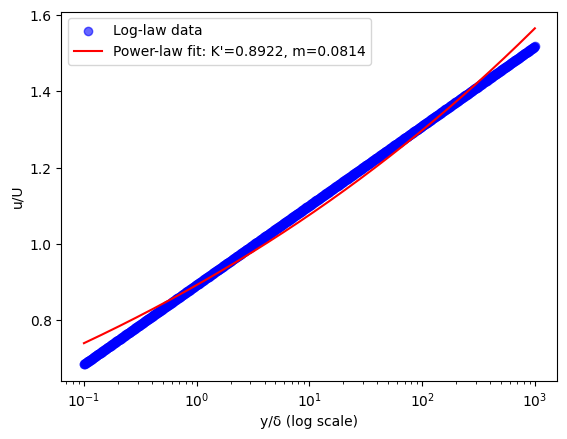

In [49]:
a = 0.41  # von Kármán constant
b = 5.0       # empirical constant

# Flow parameters
U = 1.0      # Free-stream velocity (normalized)
nu = 1.5e-5  # Kinematic viscosity (arbitrary small value)
delta = 1.0  # Boundary layer thickness # Assumed skin friction coefficient
rho = 1.225

# Compute friction velocity
u_tau = uTau(delta, U , n_fit,K_fit,rho,nu)
print(u_tau)


# Generate y values in log scale
y_values = np.logspace(-1, 3, 1000) * delta  # from very close to the wall to delta

# Compute velocity using log-law
u_values = u_tau * (1/a) * np.log(y_values * u_tau / nu) + b * u_tau
# u_values = u_tau * (1/a) * np.log(y_values/delta) + b * u_tau

u_values /= U  # Normalize u/U

# Power-law function for fitting
def power_law(y, K_prime, m):
    return K_prime * (y / delta) ** m

# Fit the power law to the generated data
popt, _ = opt.curve_fit(power_law, y_values, u_values, p0=[0,0])  # Initial guess

K_prime_fit, m_fit = popt
print(f"Fitted Parameters: K' = {K_prime_fit:.4f}, m = {m_fit:.4f}")

# Generate fitted curve
u_fit = power_law(y_values, K_prime_fit, m_fit)

# Plot original log-law data and fitted power-law curve
plt.scatter(y_values / delta, u_values, label="Log-law data", color="blue", alpha=0.6)
plt.plot(y_values / delta, u_fit, label=f"Power-law fit: K'={K_prime_fit:.4f}, m={m_fit:.4f}", color="red")

plt.xscale("log")  # Log scale for better visualization
plt.xlabel("y/δ (log scale)")
plt.ylabel("u/U")
plt.legend()
plt.show()


